# Saudi Arabia New Cars

# 1. Business Problem Understanding

## 1.1 Context

Syarah is a cars sales company based in Riyadh, Saudi Arabia. The company specializes in promoting the sale of new and used cars, assisting companies and people in purchasing or selling their vehicles as easily and quickly as possible. Syarah provides an online car marketplace through their mobile application and website, syarah.com, there users could look through their catalogue of cars that are on sale. Alternatively, users who want to sell their cars through Syarah can submit a form, filled with details of their car. Then users will bring their car to Syarah to have it inspected and then put it up in Syarah's catalogue of used cars for sale.

## 1.2 Problem Statement

In order for a car to be put in Syarah's catalogue, Syarah needs to first inspect the car then evaluate its price. Syarah will bear the cost of the inspection and not charge it on the user. The inspection cost of around [200](https://syarah.com/en/about-us/services) SAR. Thus if a user has their car inspected and receive a price they do not find satisfying and reject having their car enter Syarah's catalogue, then Syarah has lost 200 SAR. This analysis proposes a machine learning model that could predict the potential price of a car based on car features users provided through the form they submitted with cars already on Syarah's catalogue as training data. This way, Users can get an idea of what price they could sell their car and make a decision whether to go through with Syarah or look somewhere else and save Syarah time and money by reducing the amount of customers that would cancel after inspection.

## 1.3 goals

- Create a machine learning model that could predict a car's price as accurately as possible based on car features taken from Syarah's used car catalogue

- Identify which factors that would affect the predicted price of a car.

## 1.4 Analytic Approach

- Analyze the data to better understand the data and the value ranges of each feature/column

- Prepare the data by cleaning the data from missing and duplicate values a

- Determine which preprocessing methods to use for each feature and create a column transformer and pipeline

- Determine which estimator has the best performance based on evaluation metric, specifically Mean Absolute Error

- Perform hyperparameter tuning to the best estimator to improve model performance

- Evaluate model using evaluation metrics, namely Mean Absolute Error, Root Mean Squared Error, Mean Squared Error, and Mean Absolute Percentage Error

- Conduct residual analysis to better understand model performance and limitation.

- Perform model summary using SHAP to determine which features significantly impact car price prediction.

## 1.5 Evaluation Metric

This analysis uses Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE). RMSE is used as a metric for estimator benchmarking and hyperparameter tuning benchmarking

|Metric|Description|Note|
| --- |  --- |  --- |
|R2|Measures how much the model explains the proportion of the variance in the target explained by the independent variables in the model |a higher score is better|
|MAE|Calculate the mean absolute difference of the actual target with its prediction (error)|a lower value indicates better performance. MAE is not sensitive to outliers|
|RMSE|Calculate the mean squared error, then squareroot the value| a lower value indicates better performance. RMSE is less sensitive towards outliers than mse.|
|MAPE|Calculate MAE as a percentage| a lower value indicates better performance. Indicates the average percentage error of the model.|

RMSE is further emphasized as it will be the evaluation metric we use to determine the best base model and tuned model. 

RMSE is calculated by squaring the differences between the actual target values and the predicted values, then calculating the mean of these squared differences, and finally taking the square root of this mean. The formula for RMSE is as follows:

\begin{equation*}
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\end{equation*}

- n= the number of targets/data
- yi = the value of target i
- ŷi = the value of prediction i

# 2. Data Understanding

- the dataset is a list of used cars for sale on [syarah.com](https://syarah.com/en/) provided on [Kaggle](https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset) provided by Turki Bintaleb and 4 collaborators. The dataset is collected using a python (web scraping)[https://www.geeksforgeeks.org/python-web-scraping-tutorial/] library.

- The dataset contains 5624 rows, with each row representing a used car and its various attributes including its price.

Attribute Information
|Attribute|Description|
| --- |  --- |
|Type|Type of used car|
|Region|The region in which the used car was offered for sale.|
|Make|The company name.|
|Gear_Type|Gear type size of the used car.|
|Origin|Origin of the used car.|
|Options|Options of the used car.|
|Year|Manufacturing year.|
|Engine_Size|The engine size of the used car.|
|Mileage|Mileage of the used car|
|Negotiable|True if the price is 0, that means it is negotiable.|
|Price|Used car price.|


In [1]:
# import libraries necessarry for dataset exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df_raw = pd.read_csv('data_saudi_used_cars.csv')
df_raw.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [4]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df_raw.columns :
    listItem.append( [col, df_raw[col].nunique(), df_raw[col].dtype,df_raw[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique','dtype', 'Unique Sample'],data=listItem)
tabel1Desc

,Column Name,Number of Unique,dtype,Unique Sample
0,Type,347,object,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,27,object,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,58,object,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,2,object,"[Manual, Automatic]"
4,Origin,4,object,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,object,"[Standard, Full, Semi Full]"
6,Year,50,int64,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,71,float64,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,1716,int64,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,2,bool,"[True, False]"


In [5]:
pd.set_option('display.max_colwidth', 10)

## 2.1 Exploratory Data Analysis

in this section, we will do some basic exploratory data analysis on every column of the data. For numeric columns we will check if their values are normally distributed and how many outlier values they have. For categoric columns (except Negotiable), we will look at how many unique values they have and which values are 'sparse values'. Sparse values are categoric values that has a count of less than 50.

### 2.1.1 Negotiable

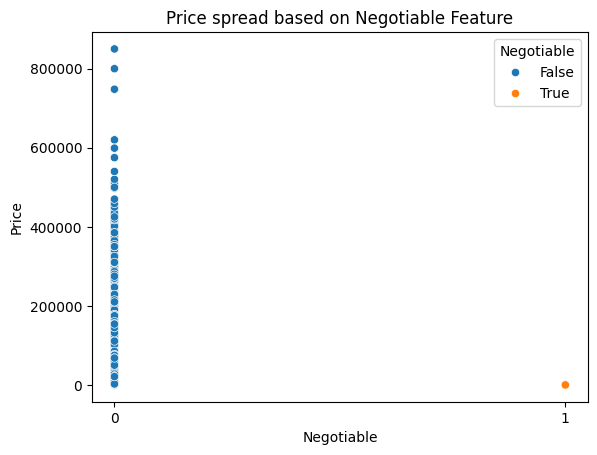

In [6]:
sns.scatterplot(data= df_raw,x='Negotiable',y='Price',hue='Negotiable')
plt.xticks(ticks=[0,1])
plt.title('Price spread based on Negotiable Feature')
plt.show()


From the graphic above, we know that a Negotiable value of 1 or True will always have the price set to 0. This does not add anything to car price prediction and may even create bias, and thus will be removed (alongside rows with price of 0)

In [7]:
df_clean = df_raw.loc[df_raw['Negotiable']==False]

### 2.1.2 Price

#### 2.1.2.1 Distribution

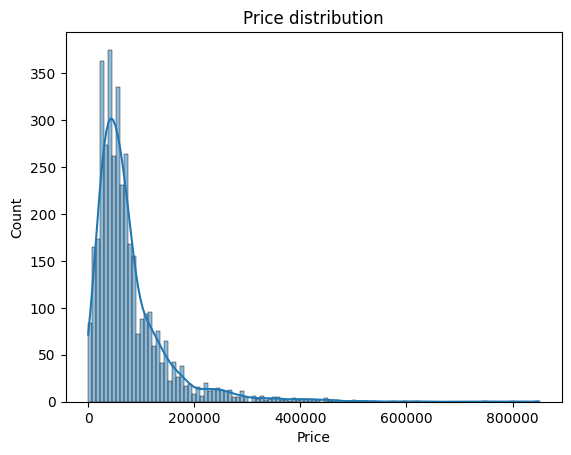

In [8]:
sns.histplot(data= df_raw.loc[df_raw['Negotiable']==False],x='Price',kde=True)
plt.title('Price distribution')
plt.show()

From the graphic above, we found that car prices (that are not negotiable) are not distributed normally and have a right or positive skew. 

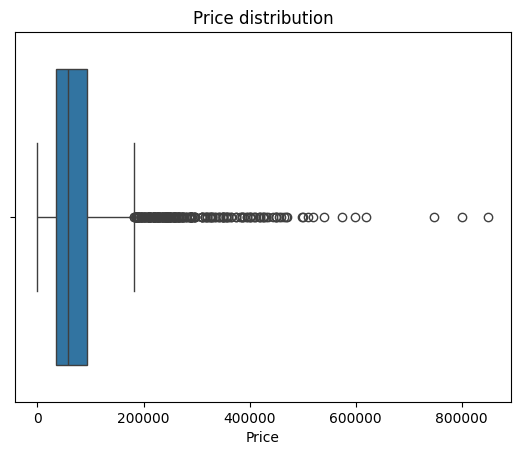

In [9]:
sns.boxplot(data= df_raw.loc[df_raw['Negotiable']==False],x='Price')
plt.title('Price distribution')
plt.show()

From the graphic above, we found that car prices (that are not negotiable) contain many outliers.

#### 2.1.2.2 Correlation with other data

In [10]:
df_raw.loc[df_raw['Negotiable']==False].select_dtypes('number').corr('spearman').iloc[:,-1].to_frame()

,Price
Year,0.420086
Engine_Size,0.378028
Mileage,-0.278193
Price,1.000000


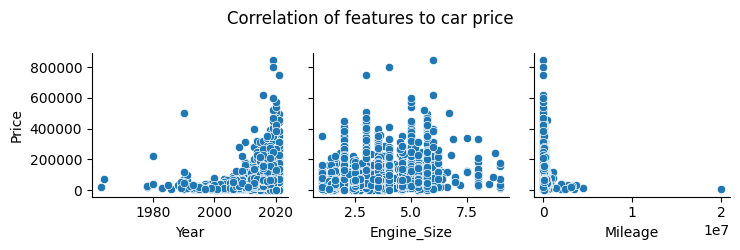

In [11]:

sns.pairplot(df_raw.loc[df_raw['Negotiable']==False].select_dtypes('number'),y_vars='Price',x_vars=['Year','Engine_Size','Mileage'])
plt.tight_layout()
plt.suptitle('Correlation of features to car price')
plt.tight_layout()
plt.show()

From the graphic and table above we found that:
- Year has a positive correlation with Price
- Engine_Size has a positive correlation with Price
- Mileage has a negative correlation with Price

### 2.1.3 Mileage

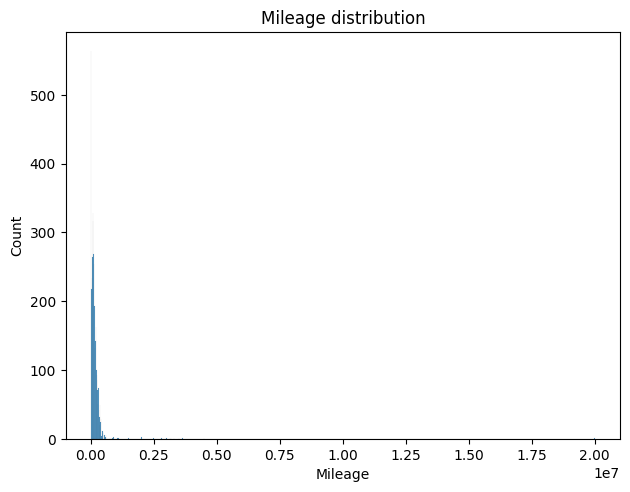

In [12]:
sns.histplot(x=df_raw.loc[df_raw['Negotiable']==False,'Mileage'])
plt.tight_layout()
plt.title('Mileage distribution')
plt.show()

Mileage column is not normally distributed, and skewed right

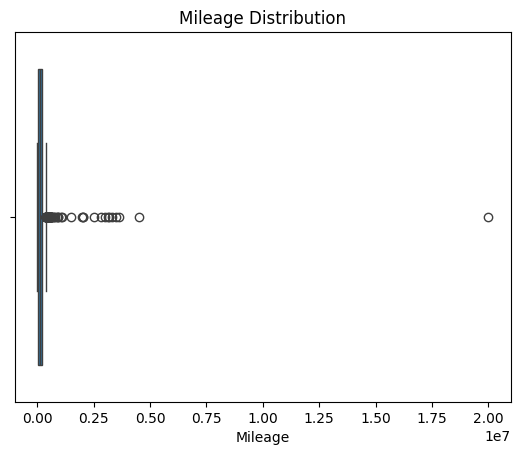

In [13]:
sns.boxplot(x=df_clean['Mileage'])
plt.title('Mileage Distribution')
plt.show()

There are significant outliers in the mileage column, and removal of its outliers is necessary.

### 2.1.4 Engine size

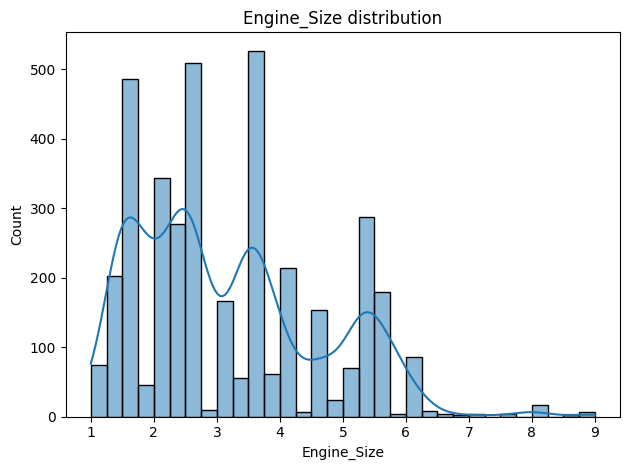

In [14]:
sns.histplot(x=df_clean['Engine_Size'],kde=True)
plt.title('Engine_Size distribution')
plt.tight_layout()
plt.show()

Engine_size is not normally distributed

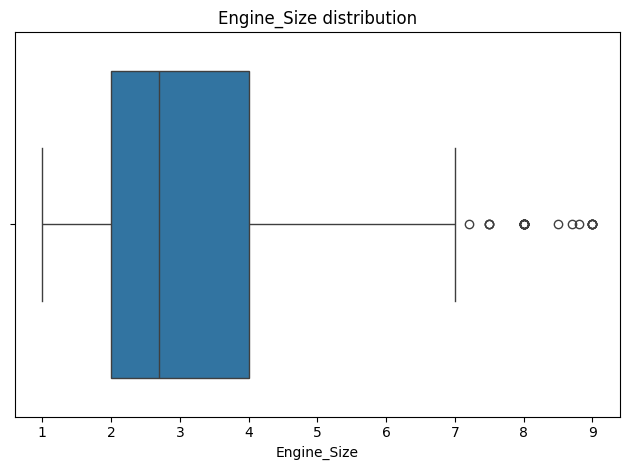

In [15]:
sns.boxplot(x=df_clean['Engine_Size'])
plt.title('Engine_Size distribution')
plt.tight_layout()
plt.show()

There are some outliers in the Engine_size column

### 2.1.5 Year

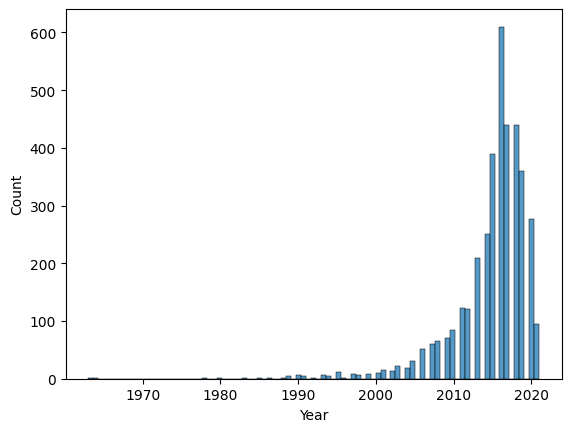

<Figure size 640x480 with 0 Axes>

In [16]:
sns.histplot(x=df_clean['Year'])
plt.show('Year distribution')
plt.tight_layout()
plt.show()

Year column is not normally distributed and left skew

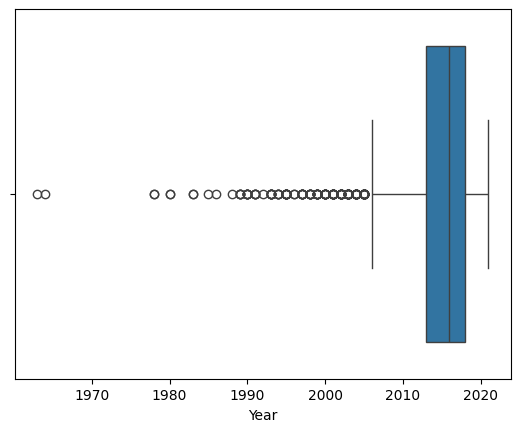

<Figure size 640x480 with 0 Axes>

In [17]:
sns.boxplot(x=df_clean['Year'])
plt.show('Year distribution')
plt.tight_layout()
plt.show()

Year column has outliers

### 2.1.5 Options

In [18]:
df_clean['Options'].nunique()

3

Options feature contains 3 unique values

In [19]:
df_clean['Options'].value_counts()

Options
Full         1473
Standard     1327
Semi Full    1028
Name: count, dtype: int64

Options features has no sparse categories

### 2.1.6 Origin

In [20]:
df_clean['Origin'].nunique()

4

Origin feature contains 4 unique values

In [21]:
df_clean['Origin'].value_counts()

Origin
Saudi          2896
Gulf Arabic     495
Other           421
Unknown          16
Name: count, dtype: int64

Origin feature has 1 sparse value : `Unknown`

### 2.1.7 Gear_Type

In [22]:
df_clean['Gear_Type'].nunique()

2

Gear_Type feature contains 2 unique values

In [23]:
df_clean['Gear_Type'].value_counts()

Gear_Type
Automatic    3424
Manual        404
Name: count, dtype: int64

Gear_Type feature has no sparse values

### 2.1.8 Make

In [24]:
df_clean['Make'].nunique()

56

Make feature contains 56 values

In [25]:
df_clean['Make'].value_counts()

Make
Toyota          890
Hyundai         514
Ford            346
Chevrolet       296
Nissan          252
Kia             187
Mercedes        173
GMC             167
Lexus           146
Mazda            92
Honda            85
BMW              72
Mitsubishi       71
Dodge            68
Land Rover       62
Jeep             42
Chrysler         36
Genesis          29
Audi             27
Renault          26
Cadillac         25
Changan          24
Geely            19
MG               18
Volkswagen       17
Porsche          15
Isuzu            12
INFINITI         10
Suzuki           10
Lincoln           9
HAVAL             9
Jaguar            8
MINI              8
Peugeot           7
Mercury           7
Fiat              6
Other             5
Daihatsu          4
Bentley           4
FAW               3
Rolls-Royce       3
Maserati          3
GAC               3
Great Wall        2
Hummer            2
Aston Martin      2
Zhengzhou         2
Foton             2
BYD               1
Škoda          

Make feature has several sparse values : `Jeep`, `Volkswagen`, `Ferrari`, etc

### 2.1.9 Region

In [26]:
df_clean['Region'].nunique()

27

Region feature contains 27 unique values

In [27]:
df_clean['Region'].value_counts()

Region
Riyadh            1617
Dammam             749
Jeddah             547
Al-Medina          124
Qassim             112
Al-Ahsa            111
Makkah              87
Aseer               87
Taef                53
Khobar              51
Tabouk              51
Jazan               34
Jubail              34
Abha                30
Hail                25
Najran              19
Al-Baha             18
Yanbu               15
Al-Jouf             15
Hafar Al-Batin      15
Al-Namas            10
Arar                 7
Wadi Dawasir         5
Qurayyat             4
Sakaka               4
Besha                3
Sabya                1
Name: count, dtype: int64

Region feature has several sparse values : `Khobar`, `Yanbu`, `Sabya`, etc

### 2.1.10 Type

In [28]:
df_clean['Type'].nunique()

320

Type feature contains 320 unique values

In [29]:
df_clean['Type'].value_counts()

Type
Camry           149
Land Cruiser    148
Accent          147
Hilux           118
Sonata          116
               ... 
Suvana            1
EC8               1
HS                1
A4                1
S8                1
Name: count, Length: 320, dtype: int64

Type feature has several sparse values : `Prius`, `Suvana`, `S8`, etc

## 3. Data Cleaning

In [30]:
#Initialize Library

# preprocessing
from sklearn.preprocessing import RobustScaler, OneHotEncoder
import category_encoders as ce

# pipeline and transformers
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# model selection
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV

# metric
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score,mean_absolute_percentage_error, median_absolute_error

# estimator
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import RidgeCV, LassoCV

# ensemble estimators
from sklearn.ensemble import StackingRegressor,VotingRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

# save model
import pickle

In order for our data set to be suitable for machine learning, it is necessarry to handle missing values and duplicate data. It may also necessarry to handle outliers to improve model performance, though it means imposing limitations to the machine learning model.

### 3.1 Missing value detection and handling

Machine learning models can not inherently handle missing values and will cause it to throw an error and stop all processes, thus it is necessarry to handle or remove missing values.

In [31]:
df_clean.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

There are no missing values in the data.

### 3.2 Duplicated data handling

The purpose of a machine learning model is to create prediction on new data based on existing (training) data. Thus any duplicated data introduced during training is at best redundant or at worst create bias within the model, and thus must be removed.

In [32]:
df_clean.duplicated().sum()

3

There are 3 rows that are duplicates, we shall remove these duplicates

In [33]:
df_clean=df_clean.drop_duplicates()

### 3.3 Outlier handling

Although machine learning models can run fine on feature outliers, those outliers may negatively effect the performance of the model. Thus it may be necessarry to remove data with outlier values, however that also means the model has limitations where several features must have values within its respective ranges. This section will discuss how feature outliers are handled, as well as removing some data with target (Price) values that do not make sense.

In [34]:
#function to drop outliers

def drop_outlier(data:pd.DataFrame,column:str,whisker:float=1.5)->pd.DataFrame:
    """_summary_

    Args:
        data (pd.DataFrame): _description_
        column (str): _description_
        whisker (float, optional): _description_. Defaults to 1.5:float.

    Returns:
        pd.Dataframe: Dataframe without outliers
    """
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    upper = q3+whisker*iqr
    lower = q1-whisker*iqr

    return data.loc[(data[column]<= upper) &(data[column]>= lower)]

The function above is used for detecting and removing data with outlier values. Using quantile 1 and 3, we can calculate the upper and lower limit value of a given column. If a data's value is above the upper limit or below the lower limit, then those values are outliers. We can extend or shorten the limit by increasing or decreasing the whisker value (default = 1.5). 

For this section we are only interested in removing extreme outliers, and thus we will set the whisker value to 2.5 thereby extending the upper and lower limit.

#### 3.3.1 Price

Although it is not necessarry to remove target outliers. It would benefit the model if the target (car prices) align with reality. Thus in this section we will make sure that the lower and upper limit of the prices from the data matches with what Syarah offers.

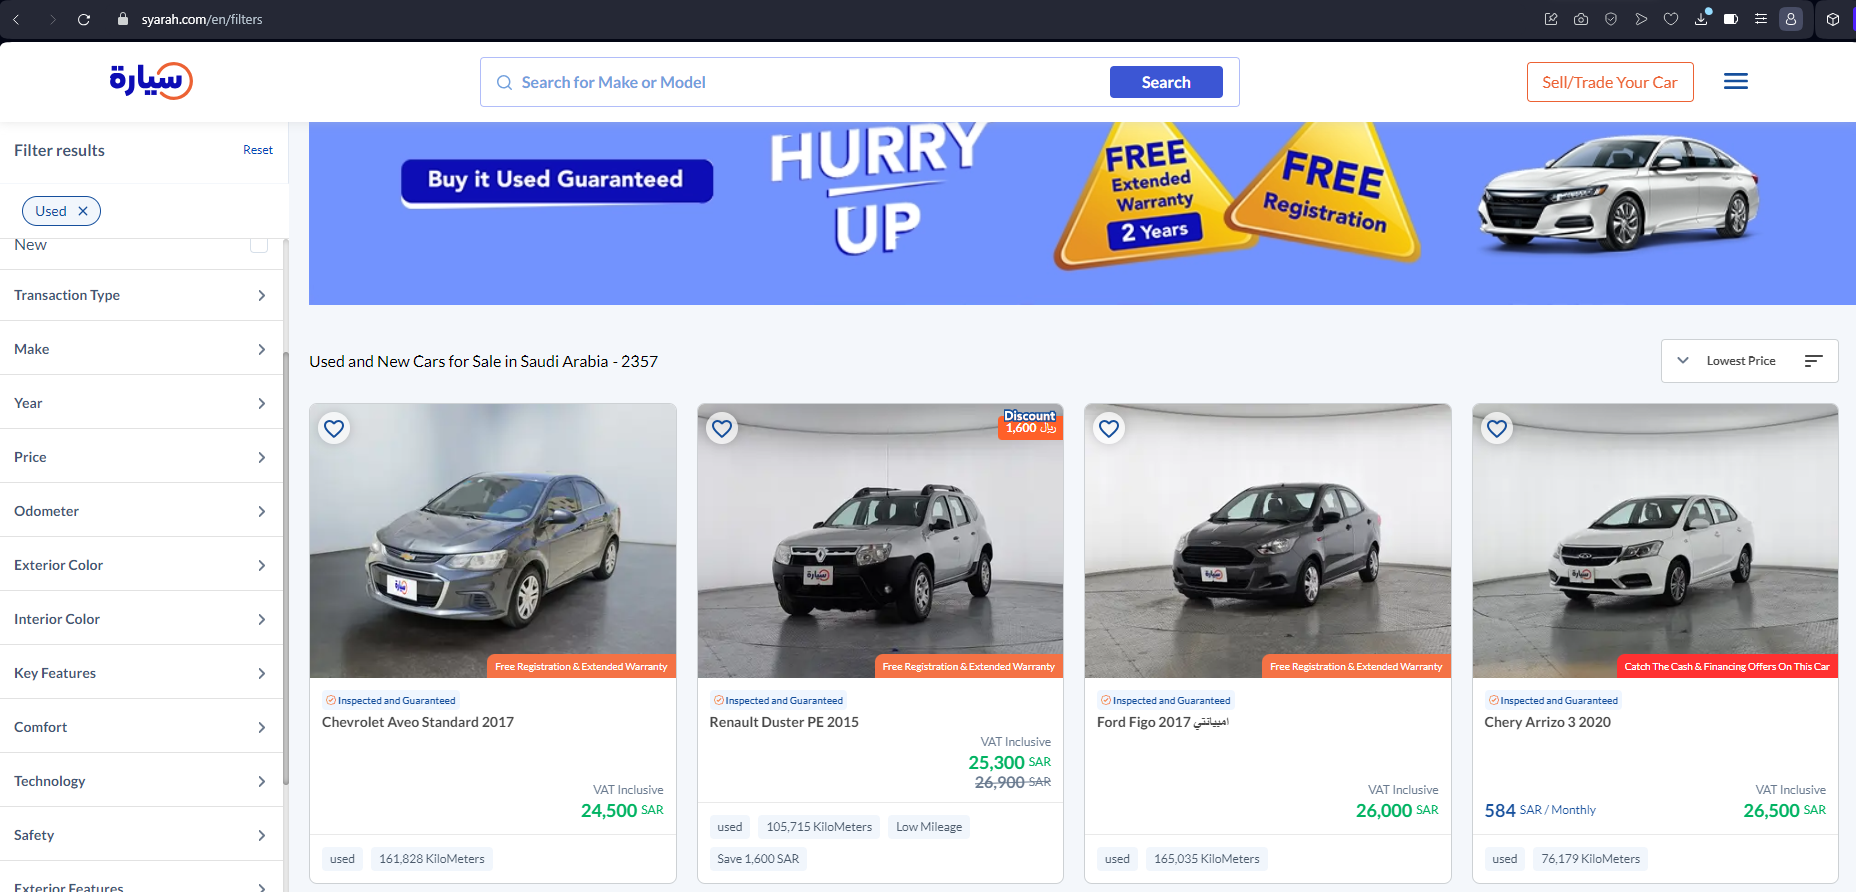

As seen in the image above, on [Syarah.com](https://syarah.com/en/filters?condition_id=0&sort=sellingprice) the lowest priced car is 24,500 SAR. However in order to give the model some flexibility and accounting for the possibility for a car to be priced under 24,500 SAR, we will set the lowest car price at 20,000 SAR and remove any data with a price under that.

In [35]:
df_clean.sort_values('Price').head(10)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3168,Furniture,Riyadh,Toyota,Automatic,Other,Semi Full,2012,2.7,225000,False,0
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,False,1
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,False,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,False,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,False,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,False,950
3760,5,Al-Ahsa,MG,Automatic,Saudi,Standard,2020,1.5,41000,False,988
3616,Elantra,Jeddah,Hyundai,Automatic,Saudi,Standard,2019,2.0,89000,False,993
1534,Yukon,Jeddah,GMC,Automatic,Saudi,Standard,2021,5.3,4000,False,1000
3892,Corolla,Hail,Toyota,Automatic,Saudi,Standard,2020,1.6,48563,False,1002


In [36]:
df_clean = df_clean.loc[df_clean['Price']>=20000]

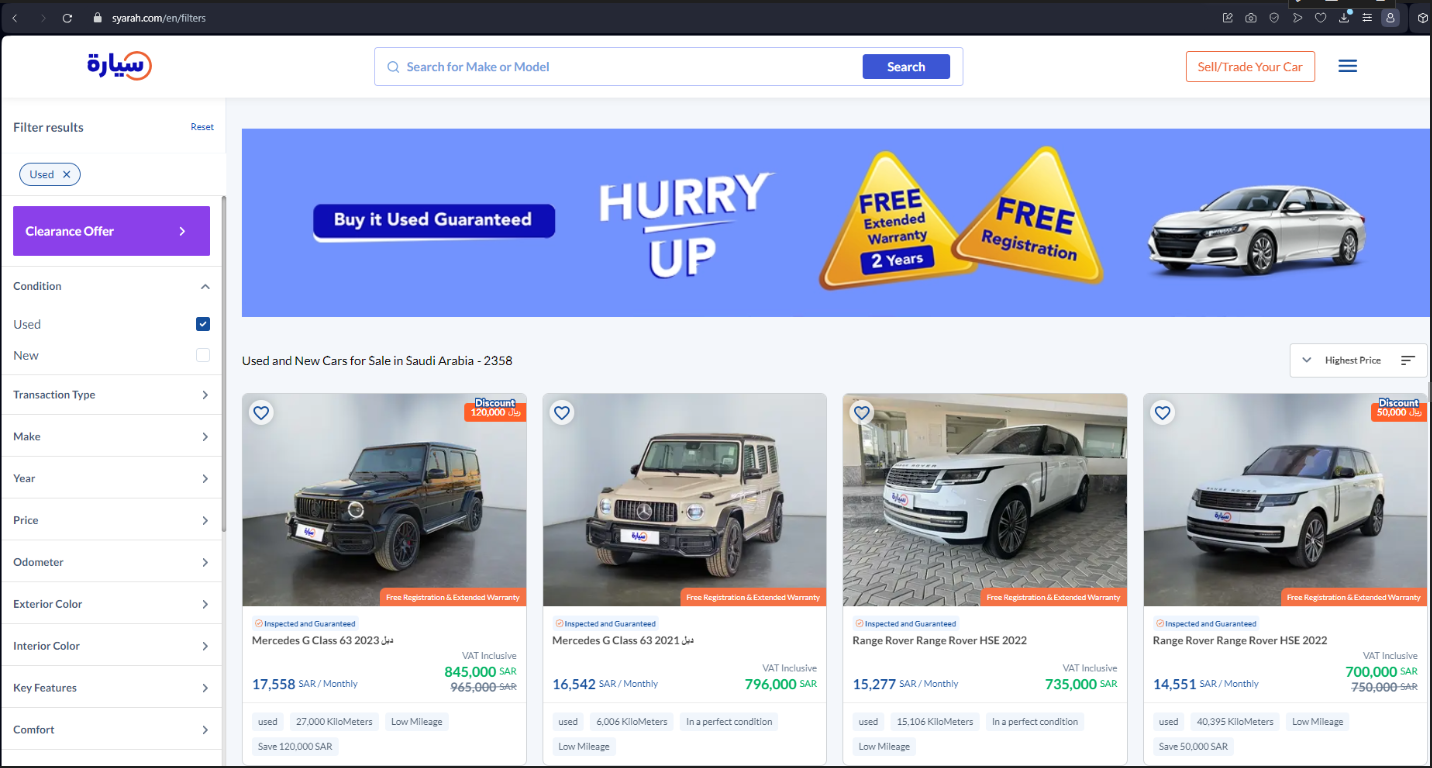

As seen in the image above, on [Syarah.com](https://syarah.com/en/filters?condition_id=0&sort=-sellingprice) the highest priced car (without discount) is 965,000 SAR. The highest priced car in our data set is 850,000, thus it is not necessarry to remove set a maximum value to Price.

In [37]:
df_clean.sort_values('Price',ascending=False).head(10)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,False,850000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,False,800000
4273,S,Dammam,Mercedes,Automatic,Gulf A...,Full,2021,3.0,2500,False,748000
2120,Ghost,Dammam,Rolls-...,Automatic,Saudi,Full,2016,6.0,40000,False,620000
4653,Range ...,Riyadh,Land R...,Automatic,Other,Full,2019,5.0,4200,False,599000
3561,Range ...,Riyadh,Land R...,Automatic,Saudi,Full,2020,5.0,26000,False,575000
3105,Range ...,Riyadh,Land R...,Automatic,Gulf A...,Full,2020,5.0,36000,False,540000
2862,Range ...,Riyadh,Land R...,Automatic,Saudi,Full,2019,5.6,36000,False,520000
2504,Range ...,Riyadh,Land R...,Automatic,Saudi,Full,2020,3.0,11500,False,510000
3041,Camargue,Dammam,Rolls-...,Automatic,Saudi,Full,1990,6.7,5000,False,500000


#### 3.3.2 Mileage

In [38]:
# drop mileage outliers w/ 2.5 whisker
df_clean = drop_outlier(df_clean,'Mileage',whisker=2.5)
print('minimal mileage',np.min(df_clean['Mileage']))
print('maximal mileage',np.max(df_clean['Mileage']))

minimal mileage 100
maximal mileage 487100


#### 3.3.3 Engine_Size

In [39]:
# drop Engine_Size outliers w/ 2.5 whisker
df_clean = drop_outlier(df_clean,'Engine_Size',whisker=2.5)
print('minimal Engine_Size',np.min(df_clean['Engine_Size']))
print('maximal Engine_Size',np.max(df_clean['Engine_Size']))

minimal Engine_Size 1.0
maximal Engine_Size 9.0


#### 3.3.4 Year

In [40]:
# drop Year outliers w/ 2.5 whisker
df_clean = drop_outlier(df_clean,'Year',whisker=2.5)
print('minimal Year',np.min(df_clean['Year']))
print('maximal Year',np.max(df_clean['Year']))

minimal Year 2004
maximal Year 2021


#### 3.3.5 outlier handling summary

- Price: 20,000 - 850,000
- Mileage: 100 - 487,100
- Engine_Size: 1.0 - 9.0
- Year: 2004 - 2021

## 4. Preprocessing

Preprocessing is a necessarry step for machine learning modeling. In this section, preprocessing consists of encoding categoric data, and scaling numerical data. Encoding transforms categoric features in to numerical representation. Scaling transforms numerical data by reducing its range while maintaining the variance between data. 

Preprocessing also consists of seperating the data between features and target, and splitting features and target in to training and testing data. Training data is used to teach the machine learning model to make predictions without explicitly programming it to perform the task. While testing data provides an independent assessment of a trained model's performance.



This model uses OneHotEncoder, BinaryEncoder, and RobustScaler:
- OneHotEncoder (OHE): an encoder where each value of a categoric feature is transformed in to a column/feature. OHE is very intrepretable but faces dimensionality issues with categoric features with a large amount of unique values. We will use OHE to encode `Gear_Type`,`Origin`, and `Options` features as they each have less than 5 unique values
- BinaryEncoder (BE): an encoder where each value of a categoric feature is represented by columns that form a binary value. BE is less intrepretable than OHE but does not face dimensionality issues to the same extent as OHE, where OHE creates 15 columns for 15 unique values, BE only creates 4 columns. We will use BE to encode `Make`,`Region`, and `Type` features as they each have more than 20 unique values
- RobustScaler (RS): a scaler using quantile and inter quantile range. RS is less susceptible to outliers. We will use RS to scale all numerical features.

In [41]:
# initialize column transformer
transformer = ColumnTransformer(transformers=[
    ('encoder_OHE',OneHotEncoder(drop='first',handle_unknown='infrequent_if_exist'),['Gear_Type','Origin','Options']),
    ('encoder_binary',ce.BinaryEncoder(),['Make','Region','Type']),
    ('scaler_robust',RobustScaler(),['Year','Engine_Size','Mileage'])
])

In [42]:
#seperate features and target
feature= df_clean.drop(['Price','Negotiable'],axis=1)
target = df_clean['Price']

In [43]:
#split data in to training and testing data
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=48)

In [44]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_train:  (2739, 9)
y_train:  (2739,)
X_test:  (685, 9)
y_test:  (685,)


## 6. Model Benchmarking

In this section we will determine which estimator to use for our machine learning model. To do that, we will be using k-fold cross-validation and grid search

K-fold Cross-validations is a technique where training data is divided in to k (5 by default) sub-sets, then each sub-set take turns becoming the validation data (where the model tries to predict its target as accurately as possible) while the rest become training data for the machine learning model, This process iterates until all sub-sets have had a turn as validation data. The purpose of this technique is to give a better estimate on the stability and consistency of a model's performance.

In [42]:
#---- Initialize estimators -----#

# simple predictive estimator
lr = LinearRegression()
knr = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=48)
transformed_lr =TransformedTargetRegressor(LinearRegression(),func=np.sqrt,inverse_func=np.square)

# Ensemble estimator
stack = StackingRegressor(estimators=[
    ('knr',knr),
    ('dt',dt),
    ('t_lr',transformed_lr)],
    final_estimator=RidgeCV()
    )
voting = VotingRegressor(estimators=[
    ('knr',knr),
    ('dt',dt),
    ('t_lr',transformed_lr)
    ])
aboost= AdaBoostRegressor(estimator=transformed_lr,random_state=48)
rf= RandomForestRegressor(random_state=48)
bagg=BaggingRegressor(estimator=transformed_lr)
gboost= GradientBoostingRegressor(random_state=48)
xgboost = XGBRegressor()
lgm = LGBMRegressor(random_state=48,verbose=-1)

A Pipeline is for simplifying the process of creating and managing machine learning workflows. It allows you to chain together multiple steps in a sequence, where each step is a transformer or an estimator. This ensures that the steps are executed in a consistent and orderly manner.

In [43]:
#initialize pipeline model
model = Pipeline(steps=[
    ('preprocessing',transformer),
    ('estimator',lr)
])

In [44]:
#initialize list of estimators
estimator_list= [
    lr,
    knr,
    dt,
    transformed_lr,
    stack,
    voting,
    aboost,
    rf,
    bagg,
    gboost,
    xgboost,
    lgm
]

Grid search is a technique to systematically search for the best hyperparameters of a model. Hyperparameters are settings external to the model that can be adjusted to optimize its performance. However, hyperparameters must be set before a model's training begins. Thus it is necessary to first make a parameter_space where every hyperparameter value that we want to set are defined, then the grid search method will generate all possible combination of the specified hyperparameter values, creating a grid where each point represents a unique set of hyperparameter configuration. the grid search method will then use a defined evaluation metric (such as negative RMSE) to determine which configuration produce the best result.

In this section we will use grid search to determine which estimator has the best performance, where our list of estimators will be used as hyperparameters. We will use negative RMSE as our evaluation metric. Because our target has several outliers, we want to use estimators that handle outliers better, thus we choose RMSE as our evaluation metric as it is more susceptible to outliers. To determine which model has the best performance, we shall choose the model with a negative RMSE score closest to 0.

In [45]:
#Initialize param space
param_space = {
    'estimator':estimator_list
}
#Initialize grid search
grid_search_model = GridSearchCV(
    estimator=model,
    param_grid=param_space,
    cv=5,
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    verbose=1
)

In [46]:
grid_search_model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('encoder_OHE',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='infrequent_if_exist'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('encoder_binary',
                                                                         BinaryEncoder(),
                                                                         ['Make',
                                                                          'Region',
                                                                          'Type']),
                                                                        ('scaler_robust',
                                                                         RobustScaler(),
                                                                         ['Year',
                                                                          'Engine_Size',
                                                                          'Mileage'])])),
                                       ('estimator', L...
                                                    max_cat_threshold=None,
                                                    max_cat_to_onehot=None,
                                                    max_delta_step=None,
                                                    max_depth=None,
                                                    max_leaves=None,
                                                    min_child_weight=None,
                                                    missing=nan,
                                                    monotone_constraints=None,
                                                    multi_strategy=None,
                                                    n_estimators=None,
                                                    n_jobs=None,
                                                    num_parallel_tree=None,
                                                    random_state=None, ...),
                                       LGBMRegressor(random_state=48,
                                                     verbose=-1)]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [76]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(grid_search_model.cv_results_).sort_values('rank_test_score')[['rank_test_score','param_estimator','mean_test_score','mean_train_score','std_test_score']].head()

,rank_test_score,param_estimator,mean_test_score,mean_train_score,std_test_score
11,1,"LGBMRegressor(random_state=48, verbose=-1)",-35071.393792,-18928.139654,7869.842043
4,2,"StackingRegressor(estimators=[('knr', KNeighborsRegressor()),\n ('dt', DecisionTreeRegressor(random_state=48)),\n ('t_lr',\n TransformedTargetRegressor(func=<ufunc 'sqrt'>,\n inverse_func=<ufunc 'square'>,\n regressor=LinearRegression()))],\n final_estimator=RidgeCV())",-36055.120871,-23403.570903,8803.031298
10,3,"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=None, ...)",-37076.995779,-5239.602270,8432.521165
7,4,RandomForestRegressor(random_state=48),-38259.704013,-14496.354602,7776.063645
1,5,KNeighborsRegressor(),-38320.932972,-30381.303373,7941.389590


The grid search method has found that Light Gradient Boosting Machine (LGBM) has the best performance for used car price prediction, with an average negative RMSE test score of -35,071.39. Before we move on to tuning the hyperparameters of LGBM, let us first discuss the its base concepts, decision tree and gradient boosting, as well as what LGBM itself is.

Decision tree is a rule based machine learning model where the model creates a hierarchy of rules derived from features of its training data. It will split the data based on a value of a feature in to 2 groups called nodes based on a certain criteria. As more splits are made from these nodes, the longer  the path from the initial node (known as the root node) to the last node (known as a leaf node), this is known as depth. For regression, the decision tree uses MSE or MAE to determine which split minimizes the MSE/MAE value. The result is a hierarchy of rules that form an inverted tree that outputs a prediction based on the features of the inputed data.

Gradient boosting is an ensemble method that builds a model in a stage-wise manner from weak learners, typically decision trees, by combining their predictions to create a strong learner. The primary idea behind gradient boosting is to sequentially add models to the ensemble, each one correcting the errors made by the previous models. Gradient boosting adds gradient descent to the boosting method, which minimizes the loss function (typically MSE or MAE), which measures the difference between the predicted and actual values.

LGBM is a gradient boosting ensemble method that builds decision trees in a sequential manner, where each new tree is trained to correct the errors made by the previous trees. Key features of LGBM are:

- Exclusive Feature Bundling (EFB): LightGBM can bundle mutually exclusive features (i.e., features that are rarely non-zero at the same time) to reduce the number of features and speed up the training process.

- Histogram-Based Decision Tree Learning: LightGBM uses a histogram-based approach to decision tree learning, which discretizes continuous features into discrete bins. This significantly reduces the complexity and speeds up the training process.

- Leaf-Wise Tree Growth: Unlike other boosting algorithms that grow trees level-wise, LightGBM grows trees leaf-wise. This means it can choose to grow the leaf with the maximum delta loss, which often results in better accuracy. However, this can also lead to overfitting, which is controlled by hyperparameters.

In [48]:
#save the base model to a .sav file
# filename = 'base_estimator_lgbm.sav'

# pickle.dump(grid_search_model.best_estimator_,open(filename,'wb'))

## 6. Hyperparameter Tuning

In order to improve the machine learning model, it is necessarry to tune its hyperparameters. We shall use gridsearch for this task. the hyperparameters we are going to tune are as follows.

1. boosting_type: specifies the type of boosting algorithm to be used. For this experiment we will be using gradient boosting decision tree (gbdt) and dropouts meet multiple additive regression trees (dart), a variant of gradient boosting that introduces dropouts during the training process. It randomly drops weak learners during the training process to prevent overfitting.

2. num_leaves: specifies the maximum number of leaves or terminal nodes in each tree. It directly controls the complexity of the trees built by the LightGBM model.

3. max_depth: controls the maximum depth of each individual decision tree in the ensemble. The depth of a tree refers to the length of the longest path from the root node to a leaf node.

4. n_estimators: controls the number of boosting iterations in the gradient boosting process.

5. min_split_gain: specifies the minimum loss reduction required to make a split during the tree building process. It controls the minimum amount of improvement in the loss function that must be achieved by splitting a node, relative to not splitting it, in order for the split to be considered.

6. min_child_weight: specifies the minimum sum of instance weights (Hessian) needed in a child (leaf) node for further partitioning.

7. min_child_samples: specifies the minimum number of data samples required in a child (leaf) node for further partitioning during the tree building process.

In [49]:
param_space = {
    'estimator':[lgm],
    'estimator__boosting_type':['gbdt','dart'],
    'estimator__num_leaves':[20,21,22],
    'estimator__max_depth':[11,10,12],
    'estimator__n_estimators':[200,225,250],
    'estimator__min_split_gain':[5,10,15],
    'estimator__min_child_weight':[0.001,0.01,0.1],
    'estimator__min_child_samples':[20,15,25],
}
grid_search_tuning_lgbm = GridSearchCV(
    estimator=model,
    param_grid=param_space,
    cv=5,
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    verbose=1,
    # error_score='raise'
)

In [50]:
grid_search_tuning_lgbm.fit(X_train,y_train)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('encoder_OHE',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='infrequent_if_exist'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('encoder_binary',
                                                                         BinaryEncoder(),
                                                                         ['Make',
                                                                          'Region',
                                                                          'Type']),
                                                                        ('scaler_robust',
                                                                         RobustScaler(),
                                                                         ['Year',
                                                                          'Engine_Size',
                                                                          'Mileage'])])),
                                       ('estimator', L...
                         'estimator__boosting_type': ['gbdt', 'dart'],
                         'estimator__max_depth': [11, 10, 12],
                         'estimator__min_child_samples': [20, 15, 25],
                         'estimator__min_child_weight': [0.001, 0.01, 0.1],
                         'estimator__min_split_gain': [5, 10, 15],
                         'estimator__n_estimators': [200, 225, 250],
                         'estimator__num_leaves': [20, 21, 22]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [72]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.DataFrame(grid_search_tuning_lgbm.cv_results_).sort_values('rank_test_score')[[
    'param_estimator',
    'param_estimator__boosting_type',
    'param_estimator__num_leaves',
    'param_estimator__max_depth',
    'param_estimator__n_estimators',
    'param_estimator__min_split_gain',
    'param_estimator__min_child_weight',
    'param_estimator__min_child_samples',
    'rank_test_score',
    'mean_test_score',
    'mean_train_score',
    'std_test_score']].head()

,param_estimator,param_estimator__boosting_type,param_estimator__num_leaves,param_estimator__max_depth,param_estimator__n_estimators,param_estimator__min_split_gain,param_estimator__min_child_weight,param_estimator__min_child_samples,rank_test_score,mean_test_score,mean_train_score,std_test_score
572,"LGBMRegressor(random_state=48, verbose=-1)",gbdt,22,12,225,5,0.001,15,1,-33203.919863,-12962.282701,8213.750554
599,"LGBMRegressor(random_state=48, verbose=-1)",gbdt,22,12,225,5,0.01,15,1,-33203.919863,-12962.282701,8213.750554
626,"LGBMRegressor(random_state=48, verbose=-1)",gbdt,22,12,225,5,0.1,15,1,-33203.919863,-12962.282701,8213.750554
569,"LGBMRegressor(random_state=48, verbose=-1)",gbdt,22,12,200,5,0.001,15,4,-33218.452675,-13842.379262,8203.938596
596,"LGBMRegressor(random_state=48, verbose=-1)",gbdt,22,12,200,5,0.01,15,4,-33218.452675,-13842.379262,8203.938596


The grid search method has found that Light Gradient Boosting Machine (LGBM) with the following hyperparameters:

|Name|Value|
|-|-|
|boosting_type|gbdt|
|num_leaves|22|
|max_depth|12|
|n_estimators|225|
|min_split_gain|5|
|min_child_weight|0.001|
|min_child_samples|15|

 has the best performance for used car price prediction, with an average negative RMSE test score of --33,203.92. 

In [52]:
# filename = 'tuned_estimator_lgbm.sav'

# pickle.dump(grid_search_tuning_lgbm.best_estimator_,open(filename,'wb'))

## 7. Model Evaluation

### 7.1 Base and Tuned Model Comparison and Evaluation

In this section we will now compare the performance of base lgbm model with the tuned lgbm model and see if there is any improvement and by how much. We will be using the evaluation metrics mentioned in section 1.5 to evaluate the performance of the aforementioned models.

In [46]:
# # load base estimator
# with open('base_estimator_lgbm.sav','rb') as file:
#     base_lgbm = pickle.load(file)

# #load estimator w/ tuning
# with open('tuned_estimator_lgbm.sav','rb') as file:
#     tuned_lgbm = pickle.load(file)


In [47]:
# store the best estimator of both gridsearch in to its own variables.
base_lgbm = grid_search_model.best_estimator_
tuned_lgbm = grid_search_tuning_lgbm.best_estimator_

In [48]:
#create predictions using each models
y_pred_base = base_lgbm.predict(X_test)
y_pred_tuned = tuned_lgbm.predict(X_test)


In [49]:
pd.set_option('display.max_colwidth', None)
test_score = {
    'Estimator':['base','tuned'],
    'R2':[],
    'MAE':[],
    'RMSE':[],
    'MAPE':[],
}

for est_pred in [y_pred_base,y_pred_tuned]:
    test_score['R2'].append(r2_score(y_test,est_pred))
    test_score['MAE'].append(mean_absolute_error(y_test,est_pred))
    test_score['RMSE'].append(root_mean_squared_error(y_test,est_pred))
    test_score['MAPE'].append(f'{round(mean_absolute_percentage_error(y_test,est_pred)*100,2)}%')
pd.DataFrame(test_score).T

,0,1
Estimator,base,tuned
R2,0.821211,0.85167
MAE,18641.073858,17236.761961
RMSE,34285.278098,31228.538777
MAPE,21.86%,20.91%


We can see from teh table above, that the tuned lgbm model is better than the base lgbm model, as such we will focus on evaluating the tuned model.

an R2 score of 0.85 indicates that about 85% of the variance in car prices can be explained by this model.

an MAE score of 17,236.76 indicates that the average prediction error of the model is 17,236.76

there is a significant difference between RMSE score and MAE score, as much as 13,991.77 which indicates that the prediction error contains outliers.

an MAPE score of 20.91% indicates that the average error of the prediction is around 20.91% of the actual price.

### 7.2 Tuned Model Residual Analysis

Residual analysis involves examining the residuals, or the differences between the observed and predicted values, to assess the quality of a regression model. for this section we will do these steps:

1. Calculate Residuals: compute the residuals for each data point. Residuals are obtained by subtracting the predicted values from the actual observed values.
2. Visual Inspection: Plot the residuals against the predicted values to visualize their distribution.
3. Check for Patterns: Examine the plots to identify any patterns or trends in the residuals.
4. Detect Outliers: Look for any outliers in the residuals, which may indicate data points that were poorly predicted by the model or influential observations that disproportionately affect the model's parameters.

In [50]:
#compute the residuals for each data point
residual = y_pred_tuned-y_test

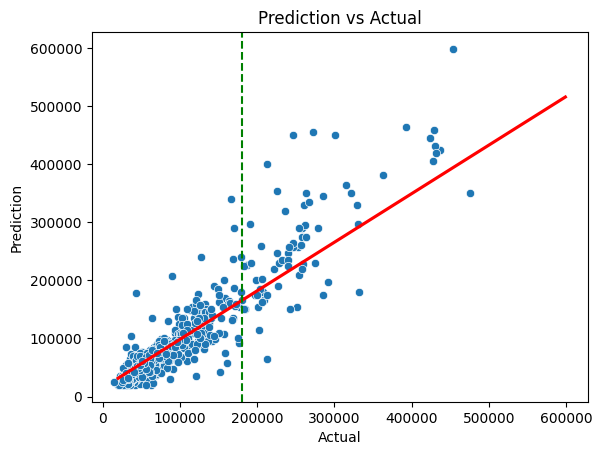

In [51]:
#Visual inspection 1 & pattern assessment
sns.regplot(x=y_test,y=y_pred_tuned,ci=None,scatter=None,color='red')
sns.scatterplot(x=y_pred_tuned,y=y_test)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Prediction vs Actual')
plt.axvline(x=180000,color='green',linestyle='--')
plt.show()

The plot indicates predictions become less accurate to prices above 180,000

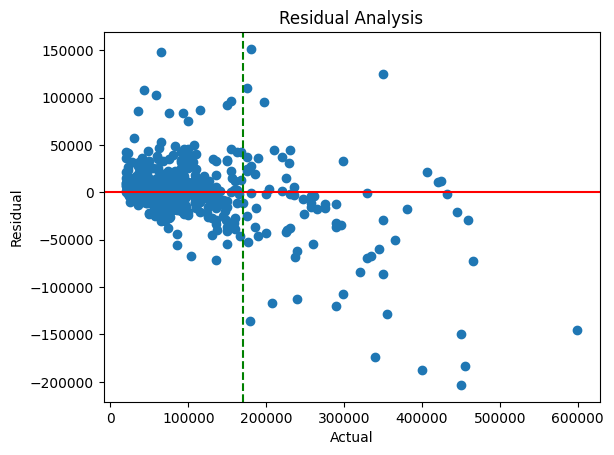

In [52]:
#Visual inspection 2  & pattern assessment
plt.scatter(x=y_test,y=residual)
plt.axhline(0,color='red')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.title('Residual Analysis')
plt.axvline(x=170000,color='green',linestyle='--')
plt.show()

The plot indicates the model underpredict more on car prices above 170,000 SAR

In [53]:
#Assess Residual Normality
from scipy.stats import kstest
from scipy.stats import shapiro

print(kstest("norm",residual))
print(shapiro(residual))

KstestResult(statistic=1.0, pvalue=0.0029154518950437317, statistic_location='893.6740959808085', statistic_sign=-1)
ShapiroResult(statistic=0.7704010580992671, pvalue=7.453992303510845e-30)


Both Kolmogorov-Smirnov Test and Shapiro Wilk Test indicate that the residuals are not normally distributed (p-Value > 0.05)

### 7.3 Model Limitations

This model has several limitations regarding its Features and Target:
- Price: The model's may have reduced performance when predicting cars with actual prices under 20,000. It is very likely that the model may over-predict the price.
- Mileage       : performs better if value is between 100-457,100
- Engine_Size   : performs better if value is between 1.0 - 9.0
- Year          : performs better if value is between 2004-2021


## 8. Model Summary

### 8.1 Overall Summary

In this section we will analyze which features significantly effect how the model predict used car prices using SHAP. SHAP (SHapley Additive exPlanations) is a powerful technique used in machine learning for explaining the output of a model by attributing the importance of each feature to the model's predictions.

In [54]:
#initialize preprocessed X_test
X_test_trans=pd.DataFrame(
    tuned_lgbm.named_steps['preprocessing']
    .transform(X_test),
    columns=tuned_lgbm
    .named_steps['preprocessing']
    .get_feature_names_out())

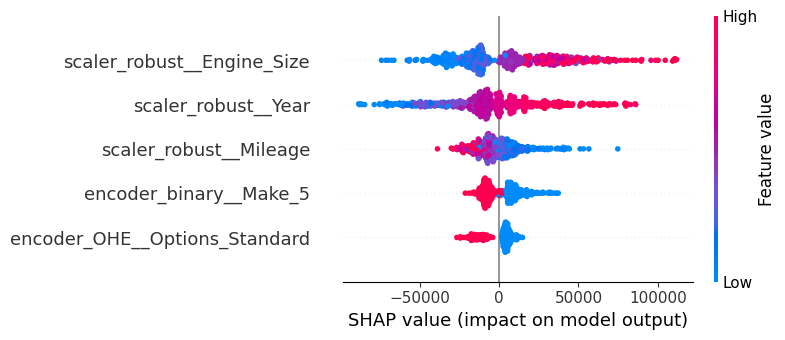

In [68]:
import shap
shap.initjs()
#put tuned lgbm estimator in to a variable
lgbm_reg= tuned_lgbm.named_steps['estimator']

#use shap.TreeExplainer to visualize feature importances
shap_values = shap.TreeExplainer(lgbm_reg,
                                data = X_test_trans,
                                model_output="raw"
                                ).shap_values(X_test_trans)
shap.summary_plot(shap_values, X_test_trans,feature_names = X_test_trans.columns, max_display = 5)

from the visualization above we found that the 3 features that contribute the most to the prediction are `Engine_Size`, `Year`, and `Mileage`.

- Engine_Size: The higher the Engine_Size value, the higher the predicted price, conversely the lower the Engine_size value the lower the predicted price. This indicates that cars with larger engine sizes will have higher predicted prices than cars with smaller engine
- Year: The higher the Year value, the higher the predicted price, conversely the lower the Year value, the lower the predicted price. This indicates older cars will have lower predicted prices than newer cars.
- Mileage: In most cases, the higher the Mileage value, the lower the predicted price, conversely the lower the Mileage value, the higher the predicted price. This indicates that cars with higher mileage will have lower predicted price than cars with lower mileage.

### 8.2 Individual summary

In this section, we will look at 3 data with the highest price prediction and 3 data with the lowest data prediction, to see how its features contribute to its predicted price.

In [56]:
X_test_trans.describe()[['scaler_robust__Year','scaler_robust__Engine_Size','scaler_robust__Mileage']]

,scaler_robust__Year,scaler_robust__Engine_Size,scaler_robust__Mileage
count,685.000000,685.000000,685.000000
mean,-0.039781,0.282044,0.157659
std,0.815133,0.745649,0.773219
min,-3.000000,-0.850000,-0.813899
25%,-0.500000,-0.350000,-0.377212
50%,0.000000,0.150000,-0.007300
75%,0.500000,0.650000,0.602888
max,1.250000,3.050000,3.014441


In [57]:
#combine preprocessed features with its predicted price
feature_pred = X_test_trans.copy()
feature_pred['pred']= y_pred_tuned

In [58]:
#take 3 highest and lowest predicted prices
high_pred= feature_pred.sort_values('pred',ascending=False).head(3).reset_index(drop=True)
low_pred= feature_pred.sort_values('pred',ascending=False).tail(3).reset_index(drop=True)

In [59]:
#define function for visualizing individual prediction
def shap_plot(j,model,S):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [60]:
print(f"The predicted price of this car is {high_pred.loc[0,'pred'].round(2)}")

shap_plot(0,lgbm_reg,high_pred.iloc[:,:-1])

The predicted price of this car is 475474.81


The observation on 1st highest predicted price, has `Year = 0.75`, `Engine_Size = 1.15`, `Mileage = -0.8`

In short, this car is `Recently produced`, has a `large engine size`, with ` low mileage`. The model predicted its price as `475,474.81 SAR`.

> Short explanation: These features (`Year = 0.75`, `Engine_Size = 1.15`, `Mileage = -0.8`, etc) support more impact on increasing the predicted price as can be seen by the red bar graph contributing more than the blue bar graph.

In [61]:
print(f"The predicted price of this car is {high_pred.loc[1,'pred'].round(2)}")

shap_plot(1,lgbm_reg,high_pred.iloc[:,:-1])

The predicted price of this car is 453980.83


The observation on 2nd highest predicted price, has `Year = 0.75`, `Engine_Size = 1.15`, `Mileage = -0.7805`

In short, this car is a `new car`, has a `large engine size`, with ` low mileage`. The model predicted its price as `453,980.83 SAR`.

> Short explanation: These features (`Year = 0.75`, `Engine_Size = 1.15`, `Mileage = -0.7805`, etc) support more impact on increasing the predicted price as can be seen by the red bar graph contributing more than the blue bar graph.

In [62]:
print(f"The predicted price of this car is {high_pred.loc[2,'pred'].round(2)}")

shap_plot(2,lgbm_reg,high_pred.iloc[:,:-1])

The predicted price of this car is 437220.01


The observation on 3rd highest predicted price, has `Year = 1`, `Engine_Size = 1.5`, `Mileage = -0.7332`

In short, this car is a `new car`, has a `large engine size`, with ` low mileage`. The model predicted its price as `437,220.01 SAR`.

> Short explanation: These features (`Year = 1`, `Engine_Size = 1.5`, `Mileage = -0.7332`, etc) support more impact on increasing the predicted price as can be seen by the red bar graph contributing more than the blue bar graph.

In [63]:
print(f"The actual price of this car is {low_pred.loc[0,'pred'].round(2)}")

shap_plot(0,lgbm_reg,low_pred.iloc[:,:-1])

The actual price of this car is 20013.28


The observation on 3rd lowest predicted price, has `Year = -1.25`, `Engine_Size = -0.15`, `Mileage = 1.181`

In short, this car is an `old car`, has a `small engine size`, with `high mileage`. The model predicted its price as `20,013.28 SAR`.

> Short explanation: These features (`Year = -1.25`, `Engine_Size = -0.15`, `Mileage = 1.181`, etc) support more impact on decreasing the predicted price as can be seen by the blue bar graph contributing more than the red bar graph.

In [64]:
print(f"The actual price of this car is {low_pred.loc[1,'pred'].round(2)}")

shap_plot(1,lgbm_reg,low_pred.iloc[:,:-1])

The actual price of this car is 19772.88


The observation on 2nd lowest predicted price, has `Year = -1.25`, `Mileage = -0.8126`

In short, this car is an `old car`, with `low mileage`. The model predicted its price as `19,772.88 SAR`.

> Short explanation: These features (`Year = -1.25`, `Mileage = -0.8126`, etc) support more impact on decreasing the predicted price as can be seen by the blue bar graph contributing more than the red bar graph.

In [65]:
print(f"The actual price of this car is {low_pred.loc[2,'pred'].round(2)}")

shap_plot(2,lgbm_reg,low_pred.iloc[:,:-1])

The actual price of this car is 15278.94


The observation on 2nd lowest predicted price, has `Year = -0.5`, `Engine_Size = -0.6`, `Mileage = 1.255`

In short, this car is an `old car`, has a `small engine size`, with `high mileage`. The model predicted its price as `15,278.94 SAR`.

> Short explanation: These features (`Year = -0.5`, `Engine_Size = -0.6`, `Mileage = 1.255`, etc) support more impact on decreasing the predicted price as can be seen by the blue bar graph contributing more than the red bar graph.

## 9. Conclusion & Recommendation

### 9.1 Conclusion

According to the model, `Year`, `Engine_Size`, dan `Mileage` are the features that affect used car price prediction the most,

Light Gradient Boosting Machine is the best among several base machine learning models, and its performance improved after conducting hyperparameter tuning.

The evaluation metric used on the model are R2, RMSE, MAE, and MAPE. Based on the MAPE score the model produced, which is 20.91%, we can conclude that when implemented and imputed with data within the set limitations (Mileage: 100 - 487,100,Engine_Size: 1.0 - 9.0,Year: 2004 - 2021) it can predict the price of a car with an error around 20.91%.

However, it is not improbable that the error of the prediction increase because of the bias produced by the model as seen by the visualization between the actual price and the predicted price. The bias is caused by the lack of data with car prices between 180,000 to 850,000 as well as several features with sparse categorical values like `type`,`make`, and `region`. 

### 9.2 Recommendation

When the model is implemented in to the website, its effectiveness should be evaluated by documenting and comparing used car after inspection rejection rate.

After Inspection Rejection Rate can be calculated by the following:

\begin{equation*}
\text{After Inspection Rejection Rate} = {\frac{\text{nRAI}}{\text{nRAI} + \text{nA} }*100}
\end{equation*}

where:
- nRAI: Number of customers reject listing their car after inspection
- nA: Number of customers accept listing their car

If the After Inspection Rejection Rate with the model implemented is lower than when the model is not implemented, then the model has succeed in its bussiness task and saving Syarah 200 SAR for every after inspection rejection the model has prevented. However, if the After Inspection Rejection Rate with the model implemented is higher than or the same as when the model is not implemented, then the model has failed its bussiness task possibly caused by over-predicting the car-price. Then it is necessary to start over and create a machine learning model with better performance.

The model should also be evaluated by used car total rejection rate. 

Total Rejection Rate can be calculated by the following:

\begin{equation*}
\text{Total Rejection Rate} = {\frac{\text{nRAI} + \text{nRBI}}{\text{nRAI} + text{nRBI} + \text{nA} }*100}
\end{equation*}

where:
- nRAI: Number of customers reject listing their car after inspection
- nRBI: Number of customers reject listing their car before inspection
- nA: Number of customers accept listing their car

This measure could indicate the total number of users that reject listing their cars. If the Total Rejection Rate with the model implemented is lower than or the same as when when the model was not implemented, then the model has no issues. However, If the Total Rejection Rate with the model implemented is higher than when the model was not implemented, then the model has reduced the potential number of cars listings possibly by under-predicting the car price. If the later happened, then it is necessarry to re-tune the model to reduce under prediction. 

To improve the performance of the model, it is recommended that:

1. Increase the amount of data of cars with prices above 180,000 SAR in order for the model to gather more information about these kinds of car and thus increasing its performance.

2. Increase the amount of data of cars with sparse values. Although LGBM and other tree-based models can handle these issues better than other machine learning models, it would help improve the performance of the model if there are more data with sparse values which give more information to the model and improve its performance.

3. Add more features, such as KM per gallon, Horsepower, Fuel Type, and more could provide more information about the price of a car and improve the performance of a model.